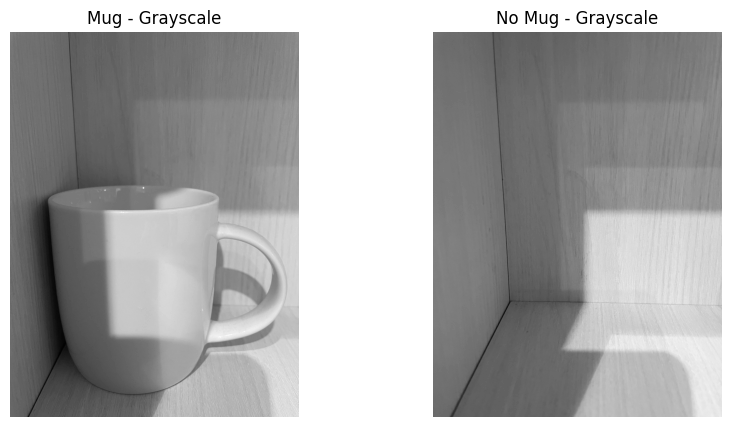

In [11]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the images
img_mug_path = 'img_mug.jpeg'
img_no_mug_path = 'img_no_mug.jpeg'

img_mug = Image.open(img_mug_path)
img_no_mug = Image.open(img_no_mug_path)

# Convert both images to 8-bit grayscale
img_mug_gray = img_mug.convert('L')
img_no_mug_gray = img_no_mug.convert('L')

# Display the grayscale images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(np.array(img_mug_gray), cmap='gray')
plt.title('Mug - Grayscale')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.array(img_no_mug_gray), cmap='gray')
plt.title('No Mug - Grayscale')
plt.axis('off')

plt.show()


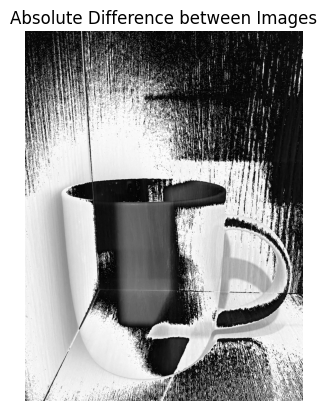

In [12]:
# Convert the PIL images to numpy arrays for image arithmetic
img_mug_array = np.array(img_mug_gray)
img_no_mug_array = np.array(img_no_mug_gray)

# Calculate the absolute difference between the two images
difference = np.abs(img_mug_array - img_no_mug_array)

# Convert the result to an image
difference_image = Image.fromarray(difference)

# Display the difference image
plt.imshow(difference, cmap='gray')
plt.title('Absolute Difference between Images')
plt.axis('off')
plt.show()


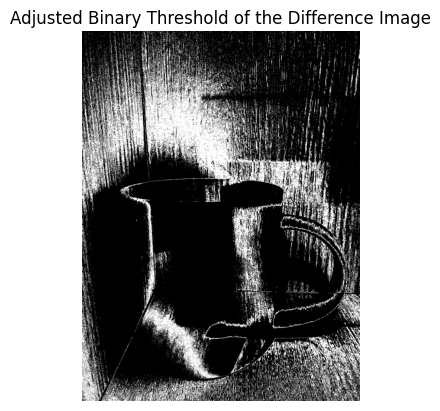

In [21]:
# To better preserve the mug and remove more noise, we will adjust the threshold value manually
# We will select a threshold that removes more background noise but still keeps the mug visible
# This required some trial and error to find the right balance

# I used a threshold level which gave me a clearer result
threshold_level_lower = np.percentile(difference, 75)

# Apply the new binary threshold
binary_threshold_lower = np.where(difference > threshold_level_lower, 255, 0)

# Convert the result to an image
binary_threshold_image_lower = Image.fromarray(binary_threshold_lower.astype(np.uint8))

# Display the new binary threshold image
plt.imshow(binary_threshold_lower, cmap='gray')
plt.title('Adjusted Binary Threshold of the Difference Image')
plt.axis('off')
plt.show()
